In [12]:
#Import dependencies
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

In [29]:
#Read from CSV
X_train, y_train, X_test, y_test = lstm.load_data('etherscan.csv', 25, True)

In [30]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.040921926498413086


In [39]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=16,
    nb_epoch=3,
    shuffle= True,
    validation_split=0.05)

Train on 721 samples, validate on 38 samples
Epoch 1/3
721/721 [==============================] - 2s 3ms/step - loss: 0.0292 - val_loss: 0.0078
Epoch 2/3
721/721 [==============================] - 2s 3ms/step - loss: 0.0382 - val_loss: 0.0082
Epoch 3/3
721/721 [==============================] - 2s 3ms/step - loss: 0.0360 - val_loss: 0.0051


Ethereum Historical Prices


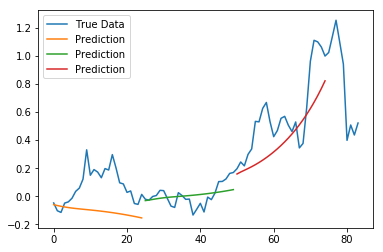

In [40]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 25, 25)
lstm.plot_results_multiple(predictions, y_test, 25)